### Обработка данных и построение модели

In [1]:
# загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# загрузка данных в датафрейм
data = pd.read_csv("./data/data_prepared.csv")
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (276883, 155)


,baths,fireplace,sqft,beds,target,zipcode_0,zipcode_1,zipcode_2,zipcode_3,zipcode_4,...,fp_4,fp_5,fp_6,fp_7,fp_8,school_count,school_distance_min,school_distance_avg,school_rating_avg,school_rating_prx
0,3,1,2900.0,4,418000.0,0,0,0,0,0,...,0,0,0,1,0,8,2.70,5.5,3.2,4.0
1,3,0,1947.0,3,310000.0,0,0,0,0,0,...,0,0,0,0,0,3,1.01,1.3,2.7,4.0
2,0,0,897.0,2,209000.0,0,0,0,0,0,...,0,0,0,0,0,0,999.00,0.0,0.0,0.0
3,0,0,1507.0,0,181500.0,0,0,0,0,0,...,0,0,0,0,0,4,0.80,3.8,1.8,3.0
4,2,0,3588.0,3,244900.0,0,0,0,0,0,...,0,0,0,0,0,6,5.60,6.4,3.2,2.0


In [6]:
# Удаляем выбросы методом Тьюки
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [8]:
outliers, cleaned = outliers_iqr(data, 'lot_size')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 20316
Результирующее число записей: 256567


In [13]:
# проверяем распределение данных по целевой переменной
fig, axes = plt.subplots(nrows=1, ncols = 2, figsize=(12,5))
histplot = sns.histplot(data = data, x = 'lot_size', ax=axes[0])
histplot.set_title('lot_size distribution')
boxplot = sns.boxplot( data = data, x = 'lot_size', ax = axes[1])
boxplot.set_title('lot_size boxplot');

KeyboardInterrupt: 

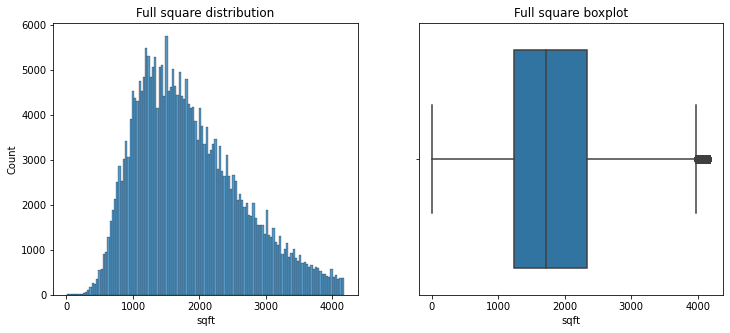

In [5]:
# проверяем распределение данных по целевой переменной
fig, axes = plt.subplots(nrows=1, ncols = 2, figsize=(12,5))
histplot = sns.histplot(data = data, x = 'sqft', ax=axes[0])
histplot.set_title('Full square distribution')
boxplot = sns.boxplot( data = data, x = 'sqft', ax = axes[1])
boxplot.set_title('Full square boxplot');

In [10]:
outliers, cleaned = outliers_iqr(data, 'school_distance_min')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 24976
Результирующее число записей: 251907


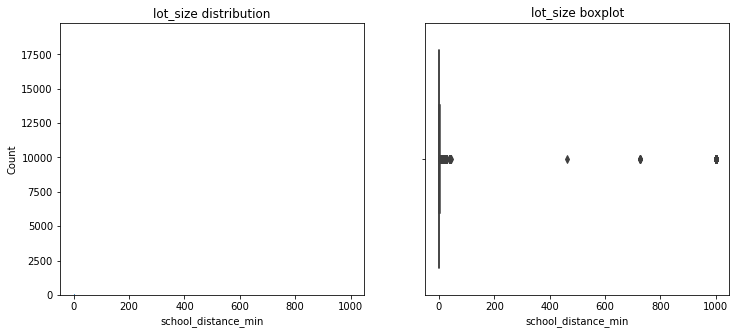

In [12]:
# проверяем распределение данных по целевой переменной
fig, axes = plt.subplots(nrows=1, ncols = 2, figsize=(12,5))
histplot = sns.histplot(data = data, x = 'school_distance_min', ax=axes[0])
histplot.set_title('lot_size distribution')
boxplot = sns.boxplot( data = data, x = 'school_distance_min', ax = axes[1])
boxplot.set_title('lot_size boxplot');